Resources

Royal Library of Belgium (kbr.be)

https://kbs-frb.be/en/celebration-belgian-antarctic-pioneers-raises-climate-awareness
https://media.kbs-frb.be/en/media/11006/Belgica%20press%20EN

North Atlantic

- https://belgica.kbr.be/BELGICA/doc/SYRACUSE/21381828
- https://uurl.kbr.be/1970847

South Atlantic

- https://uurl.kbr.be/1886830

In [1]:
#Data from image 'Belgica adrift in the Bellingshausen Sea'
#Note: plot line in this original image does not follow date sequence correctly?!
from datetime import datetime, timedelta
fmt = '%d/%m/%Y %H:%M'
d = datetime.strptime('19/2/1898 12:00', fmt)
datetime.strftime(d, fmt)

# Show some points
#date,lat,lon
data = [[datetime.strptime('20/12/1897 12:00', fmt), -60, -80],
        [datetime.strptime('1/1/1898 12:00', fmt), -69, -85],
        [datetime.strptime('19/2/1898 12:00', fmt), -69.9, -78.5],
        [datetime.strptime('26/2/1898 12:00', fmt), -69.4, -84.6],
        [datetime.strptime('28/2/1898 12:00', fmt), -69.2, -82.5], #! marked on map as 6/2 but must be a mistake
        [datetime.strptime('2/3/1898 12:00', fmt), -71.5, -85.05],
        [datetime.strptime('20/3/1898 12:00', fmt), -71.6, -88.0],
        [datetime.strptime('21/4/1898 12:00', fmt), -71.05, -92.1],
        [datetime.strptime('4/5/1898 12:00', fmt), -70.6, -89.4],
        [datetime.strptime('31/5/1898 12:00', fmt), -71.61, -87.5],
        [datetime.strptime('22/6/1898 12:00', fmt), -70.95, -83.5],
        [datetime.strptime('21/7/1898 12:00', fmt), -70.6, -86.5],
        [datetime.strptime('5/10/1898 12:00', fmt), -70.65, -82.7],
        [datetime.strptime('22/10/1898 12:00', fmt), -69.95, -80.5],
        [datetime.strptime('7/12/1898 12:00', fmt), -69.8, -82.8],
        [datetime.strptime('4/1/1899 12:00', fmt), -69.85, -85.3],
        [datetime.strptime('19/2/1899 12:00', fmt), -70.55, -94.1],
        [datetime.strptime('2/3/1899 12:00', fmt), -70.85, -97.2],
        [datetime.strptime('13/3/1899 12:00', fmt), -70.82, -102.5],
        [datetime.strptime('30/4/1899 12:00', fmt), -60,-102.5],
       ]
#points_lat = [-69.9, -69.95]
#points_lon = [-78.5, -80.5]
data

[[datetime.datetime(1897, 12, 20, 12, 0), -60, -80],
 [datetime.datetime(1898, 1, 1, 12, 0), -69, -85],
 [datetime.datetime(1898, 2, 19, 12, 0), -69.9, -78.5],
 [datetime.datetime(1898, 2, 26, 12, 0), -69.4, -84.6],
 [datetime.datetime(1898, 2, 28, 12, 0), -69.2, -82.5],
 [datetime.datetime(1898, 3, 2, 12, 0), -71.5, -85.05],
 [datetime.datetime(1898, 3, 20, 12, 0), -71.6, -88.0],
 [datetime.datetime(1898, 4, 21, 12, 0), -71.05, -92.1],
 [datetime.datetime(1898, 5, 4, 12, 0), -70.6, -89.4],
 [datetime.datetime(1898, 5, 31, 12, 0), -71.61, -87.5],
 [datetime.datetime(1898, 6, 22, 12, 0), -70.95, -83.5],
 [datetime.datetime(1898, 7, 21, 12, 0), -70.6, -86.5],
 [datetime.datetime(1898, 10, 5, 12, 0), -70.65, -82.7],
 [datetime.datetime(1898, 10, 22, 12, 0), -69.95, -80.5],
 [datetime.datetime(1898, 12, 7, 12, 0), -69.8, -82.8],
 [datetime.datetime(1899, 1, 4, 12, 0), -69.85, -85.3],
 [datetime.datetime(1899, 2, 19, 12, 0), -70.55, -94.1],
 [datetime.datetime(1899, 3, 2, 12, 0), -70.85, -9

In [2]:
# Create an interpolated dataset 
route = []
coord_index = 0
today = data[0][0]
pos = 0

R = data[-1][0] - today
for i in range(R.days):
    #if coord_index < len(data)-1:

    date0 = data[coord_index][0]
    coord0 = data[coord_index][1:3]
    date1 = data[coord_index+1][0]
    coord1 = data[coord_index+1][1:3]

    #Reached end of this range of dates?
    if today == date1:
        #Move to next range
        coord_index += 1
        pos = 0   

    #Get days in range
    delta = date1 - date0
    #print(delta.days)
    #Get lerp factor
    L = pos / (delta.days-1)
    lat = coord0[0] + L * (coord1[0] - coord0[0])
    lon = coord0[1] + L * (coord1[1] - coord0[1])
    #print(L, lat, lon, delta.days, pos)

    route.append([str(today), lat, lon])
    today += timedelta(days=1)
    pos += 1

#Add last point
route.append(data[-1])
route[-1][0] = str(route[-1][0])

In [3]:
#for r in route:
#    print(r)
print(len(route))
print(route[0])
print(route[-1])

497
['1897-12-20 12:00:00', -60.0, -80.0]
['1899-04-30 12:00:00', -60, -102.5]


In [4]:
import json
with open('route.json', 'w') as f:
    json.dump(route, f)

In [5]:
import json
with open('route.json', 'r') as f:
    route = json.load(f)
print(len(route))
print(route[0])
print(route[-1])

497
['1897-12-20 12:00:00', -60.0, -80.0]
['1899-04-30 12:00:00', -60, -102.5]


/home/owen/python-default/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/owen/python-default/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


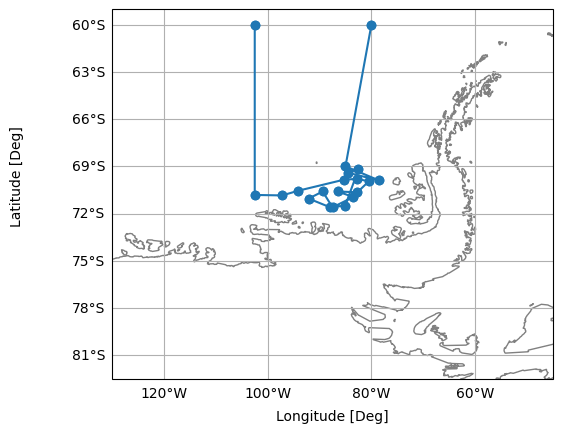

In [6]:
#https://stackoverflow.com/questions/64976143/cartopy-fails-with-small-regional-plots-in-polar-regions
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import matplotlib.ticker as mticker


# the limits of the map
extent = (-100.0, -75.0, -69, -72.5)
extent = (-130.0, -45.0, -59, -82.5)

# set the projection type
c_lon, c_lat = (extent[0] + extent[1])/2., (extent[2] + extent[3])/2.
proj = ccrs.PlateCarree() #central_longitude=c_lon)
# proj = ccrs.Mercator(c_lon)    # I've tried these as well
# proj = ccrs.Orthographic(c_lon, c_lat)

gax = plt.axes(projection=proj)
gax.set_extent(extent, crs=proj) #ccrs.PlateCarree())

# now add the coastline. This only works for big maps. Small regions fail.
coastline_10m = NaturalEarthFeature(category='physical', name='coastline', \
                    facecolor='none', scale='10m')
gax.add_feature(coastline_10m, edgecolor='gray')

# draw a grid with labelled lat and lon. Suppress ticklabels on the top and right.
gl = gax.gridlines(crs=proj, draw_labels=True) # only works with PlateCarree()
gl.xlabels_top = None
gl.ylabels_right = False

# now we put labels on the X and Y axes. You have to move these around manually.
gax.text(-0.2, 0.55, 'Latitude [Deg]', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=gax.transAxes)
gax.text(0.5, -0.12, 'Longitude [Deg]', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=gax.transAxes)

# Show some points
points_lat = [p[1] for p in data]
points_lon = [p[2] for p in data]
plt.scatter(points_lon, points_lat, transform=ccrs.PlateCarree(), zorder=5)
plt.plot(points_lon, points_lat, '-o', transform=ccrs.PlateCarree(), zorder=5)

# approximately correct for the aspect ratio
plt.gca().set_aspect(1.0/(np.cos(np.pi*(extent[2] + extent[3])/(2.*180.))))
plt.show()


/home/owen/python-default/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/owen/python-default/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


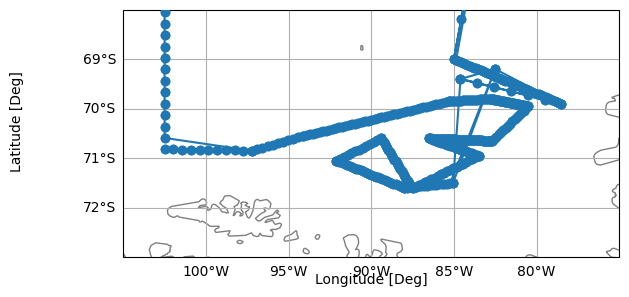

In [7]:
#https://stackoverflow.com/questions/64976143/cartopy-fails-with-small-regional-plots-in-polar-regions
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import matplotlib.ticker as mticker


# the limits of the map
extent = (-105.0, -75.0, -68, -73)
#extent = (-130.0, -45.0, -59, -82.5)

# set the projection type
c_lon, c_lat = (extent[0] + extent[1])/2., (extent[2] + extent[3])/2.
proj = ccrs.PlateCarree() #central_longitude=c_lon)
# proj = ccrs.Mercator(c_lon)    # I've tried these as well
# proj = ccrs.Orthographic(c_lon, c_lat)

gax = plt.axes(projection=proj)
gax.set_extent(extent, crs=proj) #ccrs.PlateCarree())

# now add the coastline. This only works for big maps. Small regions fail.
coastline_10m = NaturalEarthFeature(category='physical', name='coastline', \
                    facecolor='none', scale='10m')
gax.add_feature(coastline_10m, edgecolor='gray')

# draw a grid with labelled lat and lon. Suppress ticklabels on the top and right.
gl = gax.gridlines(crs=proj, draw_labels=True) # only works with PlateCarree()
gl.xlabels_top = None
gl.ylabels_right = False

# now we put labels on the X and Y axes. You have to move these around manually.
gax.text(-0.2, 0.55, 'Latitude [Deg]', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=gax.transAxes)
gax.text(0.5, -0.12, 'Longitude [Deg]', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=gax.transAxes)

# Show some points
points_lat = [p[1] for p in route]
points_lon = [p[2] for p in route]
plt.scatter(points_lon, points_lat, transform=ccrs.PlateCarree(), zorder=5)
plt.plot(points_lon, points_lat, '-o', transform=ccrs.PlateCarree(), zorder=5)

# approximately correct for the aspect ratio
plt.gca().set_aspect(1.0/(np.cos(np.pi*(extent[2] + extent[3])/(2.*180.))))
plt.show()


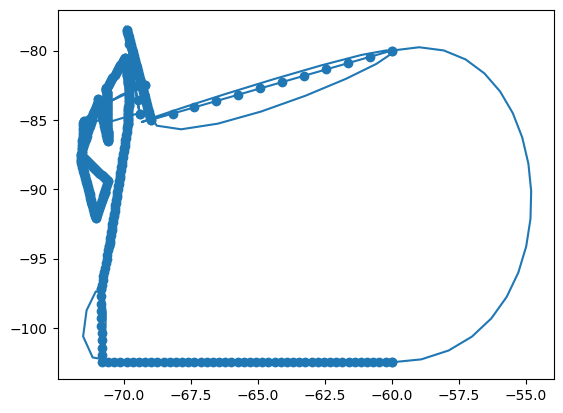

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

x, y = points_lat, points_lon
#create spline function
f, u = interpolate.splprep([x, y], s=0, per=True)
#create interpolated lists of points
xint, yint = interpolate.splev(np.linspace(0, 1, 200), f)
plt.scatter(x, y)
plt.plot(xint, yint)
plt.show()

# Better Route Data!

Sources
 - Summary: https://www.lifewatch.be/en/scientific-papers-belgian-antarctic-expedition-1897-1899
 - Plates: https://www.vliz.be/wetenschatten/beeldbank.php?album=1202
 - Data: https://www.vliz.be/en/imis?module=dataset&dasid=4228 (Flanders Marine Institute (VLIZ))

The Antarctic Expedition dataset includes 2,082 records (1,933 species, 100 genus and 49 higher level observations) for 235 sampling locations in the Antarctic region. Data were digitized from 31 original expedition reports including 29 zoological and 2 botanical (diatoms and lichenized fungi) reports. Taxa belonged to 16 phyla of which the Arthropoda were the most abundant with 26.3% of observations (160 species), followed by the Ochrophyta (15.7%, 240 diatom species) and the Bryozoa (14.5%, 95 species). Most Chordates belonged to the seals (phocids and otariids), penguins and other bird species.


Cite: Commission de la Belgica; (2015): Scientific reports from expeditions with the Belgica in the Antarctic between 1897-1899 (A. Gerlache de Gomery). https://doi.org/10.14284/68

André E.; Attems C.; Barrett-Hamilton G.E.H.; Becker Th.; Bergroth E.; Böhmig L.; Boileau H.; Bourgeois J.; Bovie A.; Brenske E.; Brunner Von Wattenwyl C.; Cernosvitov L.; de Gerlache de Gomery A.; de Man J.G.; de Selys Longchamps M.; Dilwyn J.D.; Dupond C.; Emery C.; Fairmaire L.; Fauvel P.; Giesbrecht W.; Giltay L.; Grouvelle A.; Hansen H.J.; Hartlaub Cl.; Hérouard E.; Hoek P.P.C.; Ihle J.E.W.; Jacobs J.-Ch.; Joubin L.; Koehler R.; Lameere A.; Leloup E.; Ludwig H.; Maas O.; Monod Th.; Müller G.W.; Olivier E.; Pelseneer P.; Racovitza E.-G.; Rousseau E.; Rübsaamen E.H.; Ruffo S.; Schouteden H.; Severin G.; Stierlin G.; Topsent E.; Tosquinet J.; Vachal J.; Van Beneden E.; Van Heurck H.; von Marenzeller E.; Wainio E.A.; Waters A.W.; Commission de la Belgica; (2015): Scientific reports from expeditions with the Belgica in the Antarctic between 1897-1899 (A. Gerlache de Gomery). https://doi.org/10.14284/68

In [9]:
import os
import pandas as pd

In [10]:
path = os.getcwd() + '/Voyage_Data'
files = os.listdir(path)
files_xls = [f for f in files if f[-3:] == 'xls']
files_xls

['Data-arch refID63697.xls',
 'Data-arch refID63640.xls',
 'Data-arch refID20762.xls',
 'Data-arch refID63687.xls',
 'Data-arch refID63653.xls',
 'Data-arch refID63642.xls',
 'Data-arch refID63703.xls',
 'Data-arch refID63659.xls',
 'Data-arch refID33299.xls',
 'Data-arch refID63639.xls',
 'Data-arch refID63692.xls',
 'Data-arch refID63644.xls',
 'Data-arch refID20764.xls',
 'Data-arch refID63633.xls',
 'Data-arch refID63634.xls',
 'Data-arch refID63696.xls',
 'Data-arch refID63647.xls',
 'Data-arch refID63636.xls',
 'Data-arch refID63626.xls',
 'Data-arch refID63643.xls',
 'Data-arch refID33691.xls',
 'Data-arch refID63688.xls',
 'Data-arch refID33127.xls',
 'Data-arch refID20768.xls',
 'Data-arch refID63655.xls',
 'Data-arch refID20760.xls',
 'Data-arch refID63684.xls',
 'Data-arch refID63656.xls',
 'Data-arch refID63652.xls',
 'Data-arch refID63678.xls',
 'Data-arch refID63690.xls']

In [11]:
#!pip install -U pandas

In [12]:
df = pd.DataFrame()

In [13]:
#!pip install xlrd
for f in sorted(files_xls):
    fn = path + '/' + f
    print(fn)
    xl = pd.ExcelFile(fn)
    xl.sheet_names  # see all sheet names
    for sheet in ['MDA_Data', 'MDA_data']:
        try:
            #data = pd.read_excel(fn, sheet)
            data = xl.parse(sheet, skiprows=2) #, skip_blank_lines=True) #[0,1])

            #df = df.append(data)
            #Filter rows without exact date (format 1897/1899)
            #print(data['Eventdate'].dtype)
            #data = data[~data['Eventdate'].str.contains("/",na=False)]
            #data = data[~data['Eventdate'].str.len() == 10]
            data = data.query('Eventdate.str.len() == 10')
            #print(data['Eventdate'].dtype)
            #data = data[data['Eventdate'] != "1897/1899"]
            df = pd.concat([df, data], ignore_index=True)
        except (ValueError) as e:
            #print(e)
            pass
    #break
#df = pd.concat(pd.read_excel(excel_file) for excel_file in all_excel_files)
#With ignore_index = True the index of df will be labeled 0, …, n - 1.

/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID20760.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID20762.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID20764.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID20768.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID33127.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID33299.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID33691.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63626.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63633.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63634.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63636.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63639.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63640.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63642.xls
/home/owen/ACCESS-NRI/Sea-Ice/Voyage_Data/Data-arch refID63643

In [14]:
#for d in df['Eventdate']:
#    print(d)
#pd.to_datetime(df['Eventdate'])
#df["Date"] = pd.to_datetime(df['Eventdate'])
df['Eventdate']= pd.to_datetime(df['Eventdate'])

In [15]:
#Filter no location
df = df[df['Latitude'].notnull()]

In [16]:
df.columns

Index(['Survey', 'LocationID', 'Longitude', 'Latitude', 'WKTFootPrint',
       'EventID', 'SamplingProtocol', 'Eventdate', 'MinimumDepth_m ',
       'MaximumDepth_m ', 'FieldNumber', 'SampleSize', 'ScientificName',
       'AphiaID', 'LifeStage', 'ObservedIndividualCount', 'MinimumDepth_m',
       'MaximumDepth_m', 'Sex', 'Observed Individual Count', 'Remark',
       'MinimumDepth ', 'MaximumDepth ', 'MaximumDepth _m'],
      dtype='object')

In [17]:
df.sort_values('Eventdate')

,Survey,LocationID,Longitude,Latitude,WKTFootPrint,EventID,SamplingProtocol,Eventdate,MinimumDepth_m,MaximumDepth_m,...,LifeStage,ObservedIndividualCount,MinimumDepth_m,MaximumDepth_m,Sex,Observed Individual Count,Remark,MinimumDepth,MaximumDepth,MaximumDepth _m
906,Belgian Antarctic Expedition,NaN,-25.933333,11.016667,POINT(-25.93333 11.01667),NaN,Harpoon,1897-09-27,NaN,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,Belgian Antarctic Expedition,Port Famine,-70.927778,-53.611111,POINT(-70.927778 -53.611111),N°116,NaN,1897-09-28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,Belgian Antarctic Expedition,NaN,-26.116667,9.483333,POINT(-26.11667 9.48333),NaN,Harpoon,1897-09-28,NaN,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
908,Belgian Antarctic Expedition,NaN,-29.333333,-0.583333,POINT(-29.33333 -0.58333),NaN,Harpoon,1897-10-07,NaN,NaN,...,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,Belgian Antarctic Expedition,NaN,-30.666667,-2.233333,POINT(-30.66667 -2.23333),NaN,Harpoon,1897-10-08,NaN,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Belgian Antarctic Expedition,NaN,-102.250000,-70.666670,POINT(-102.25 -70.66667),N°1020,Chalut III,1899-03-14,NaN,NaN,...,NaN,NaN,2800.0,2800,NaN,NaN,NaN,NaN,NaN,NaN
153,Belgian Antarctic Expedition,NaN,-102.250000,-70.666660,POINT(-102.25 -70.66666),N°875,Chalut III,1899-03-14,NaN,NaN,...,NaN,1.0,300.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN
1442,Belgian Antarctic Expedition,NaN,-85.000000,-50.000000,POINT(-85 -50),N°883,Direct observation,1899-03-20,NaN,NaN,...,Adult,1.0,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN
1443,Belgian Antarctic Expedition,NaN,-85.000000,-55.500000,POINT(-85 -55.5),N°884,Direct observation,1899-03-21,NaN,NaN,...,Adult,1.0,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN


In [18]:
df.columns

Index(['Survey', 'LocationID', 'Longitude', 'Latitude', 'WKTFootPrint',
       'EventID', 'SamplingProtocol', 'Eventdate', 'MinimumDepth_m ',
       'MaximumDepth_m ', 'FieldNumber', 'SampleSize', 'ScientificName',
       'AphiaID', 'LifeStage', 'ObservedIndividualCount', 'MinimumDepth_m',
       'MaximumDepth_m', 'Sex', 'Observed Individual Count', 'Remark',
       'MinimumDepth ', 'MaximumDepth ', 'MaximumDepth _m'],
      dtype='object')

In [19]:
df.dtypes

Survey                               object
LocationID                           object
Longitude                           float64
Latitude                            float64
WKTFootPrint                         object
EventID                              object
SamplingProtocol                     object
Eventdate                    datetime64[ns]
MinimumDepth_m                      float64
MaximumDepth_m                      float64
FieldNumber                         float64
SampleSize                          float64
ScientificName                       object
AphiaID                             float64
LifeStage                            object
ObservedIndividualCount              object
MinimumDepth_m                       object
MaximumDepth_m                       object
Sex                                  object
Observed Individual Count           float64
Remark                               object
MinimumDepth                        float64
MaximumDepth                    

In [20]:
loc_date = df[['Eventdate', 'Latitude', 'Longitude']]
loc_date_arr = loc_date.to_numpy()
loc_date

,Eventdate,Latitude,Longitude
0,1898-05-11,-71.150000,-89.250000
1,1898-10-08,-70.383330,-82.783330
2,1898-05-18,-71.300000,-88.033330
3,1898-05-12,-71.233330,-89.233330
4,1898-05-12,-71.233330,-89.233330
...,...,...,...
1663,1898-02-13,-65.258330,-64.500000
1664,1898-01-25,-64.233333,-61.216667
1665,1898-02-13,-65.258330,-64.500000
1666,1898-01-25,-64.233333,-61.216667


In [21]:
loc_date_arr

array([[Timestamp('1898-05-11 00:00:00'), -71.15, -89.25],
       [Timestamp('1898-10-08 00:00:00'), -70.38333, -82.78333],
       [Timestamp('1898-05-18 00:00:00'), -71.3, -88.03333],
       ...,
       [Timestamp('1898-02-13 00:00:00'), -65.25833, -64.5],
       [Timestamp('1898-01-25 00:00:00'), -64.2333333, -61.2166667],
       [Timestamp('1898-02-13 00:00:00'), -65.25833, -64.5]], dtype=object)

In [22]:
loc_date_arr[::,0]

array([Timestamp('1898-05-11 00:00:00'), Timestamp('1898-10-08 00:00:00'),
       Timestamp('1898-05-18 00:00:00'), ...,
       Timestamp('1898-02-13 00:00:00'), Timestamp('1898-01-25 00:00:00'),
       Timestamp('1898-02-13 00:00:00')], dtype=object)

<Axes: xlabel='Latitude', ylabel='Longitude'>

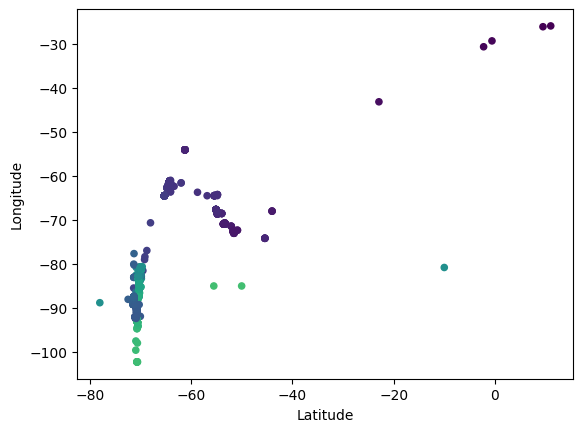

In [23]:
df.plot.scatter(x='Latitude', y='Longitude', c='Eventdate')

In [24]:
route = list(loc_date_arr)

route = sorted(route,key=lambda x: x[0])
for i,r in enumerate(route):
    route[i][0] = str(route[i][0].to_pydatetime())
    route[i] = list(route[i])

#Remove duplicates
import itertools
route = list(route for route,_ in itertools.groupby(route))

route

[['1897-09-27 00:00:00', 11.016666666666667, -25.933333333333334],
 ['1897-09-28 00:00:00', -53.611111, -70.927778],
 ['1897-09-28 00:00:00', 9.483333333333333, -26.116666666666667],
 ['1897-10-07 00:00:00', -0.5833333333333334, -29.333333333333332],
 ['1897-10-08 00:00:00', -2.2333333333333334, -30.666666666666668],
 ['1897-10-22 00:00:00', -22.9, -43.166666666666664],
 ['1897-11-12 00:00:00', -50.83333, -72.33333],
 ['1897-11-12 00:00:00', -51.66667, -72.63333],
 ['1897-11-12 00:00:00', -51.53333, -72.3],
 ['1897-11-13 00:00:00', -50.83333, -72.33333],
 ['1897-11-16 00:00:00', -51.66667, -72.63333],
 ['1897-11-17 00:00:00', -44.0, -68.0],
 ['1897-11-17 00:00:00', -51.524, -73.024],
 ['1897-11-17 00:00:00', -51.66667, -72.63333],
 ['1897-11-17 00:00:00', -51.524, -73.024],
 ['1897-11-17 00:00:00', -51.66667, -72.63333],
 ['1897-11-17 00:00:00', -51.524, -73.024],
 ['1897-11-17 00:00:00', -51.66667, -72.63333],
 ['1897-11-18 00:00:00', -51.66667, -72.63333],
 ['1897-11-19 00:00:00', -4

In [25]:
import json
with open('route_full.json', 'w') as f:
    json.dump(route, f)

-71.48333333333333 51.58611304403033 -102.25 4.34386826237909


/home/owen/python-default/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/owen/python-default/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


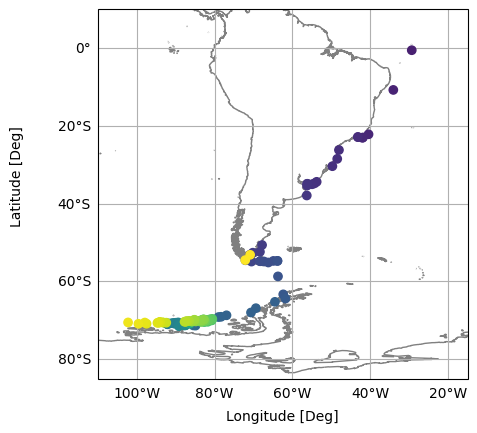

In [26]:
#Load manually cleaned data
import json
import numpy as np
#with open('route_full.json', 'r') as f:    
with open('route_full_cleaned.json', 'r') as f:
    route = json.load(f)
#Strip description fields
for i,r in enumerate(route):
    if len(r) > 3:
        route[i] = r[0:3]

loc_date_arr = np.array(route)


from datetime import datetime, timedelta
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import matplotlib.ticker as mticker

points_lat = loc_date_arr[::,1].astype(float)
points_lon = loc_date_arr[::,2].astype(float)
days = [datetime.fromisoformat(d).toordinal() for d in loc_date_arr[::,0]]

# the limits of the map
print(points_lat.min(), points_lat.max(), points_lon.min(), points_lon.max())
#extent = (-105.0, -75.0, -68, -73)
extent = (-110.0, -15.0, 10, -85)

# set the projection type
c_lon, c_lat = (extent[0] + extent[1])/2., (extent[2] + extent[3])/2.
proj = ccrs.PlateCarree() #central_longitude=c_lon)

gax = plt.axes(projection=proj)
gax.set_extent(extent, crs=proj) #ccrs.PlateCarree())

# now add the coastline. This only works for big maps. Small regions fail.
coastline_10m = NaturalEarthFeature(category='physical', name='coastline', \
                    facecolor='none', scale='10m')
gax.add_feature(coastline_10m, edgecolor='gray')

# draw a grid with labelled lat and lon. Suppress ticklabels on the top and right.
gl = gax.gridlines(crs=proj, draw_labels=True) # only works with PlateCarree()
gl.xlabels_top = None
gl.ylabels_right = False

# now we put labels on the X and Y axes. You have to move these around manually.
gax.text(-0.2, 0.55, 'Latitude [Deg]', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=gax.transAxes)
gax.text(0.5, -0.12, 'Longitude [Deg]', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=gax.transAxes)

# Show some points

plt.scatter(points_lon, points_lat, transform=ccrs.PlateCarree(), zorder=5, c=days)
#plt.plot(points_lon, points_lat, '-o', transform=ccrs.PlateCarree(), zorder=5)

# approximately correct for the aspect ratio
#plt.gca().set_aspect(1.0/(np.cos(np.pi*(extent[2] + extent[3])/(2.*180.))))
plt.show()


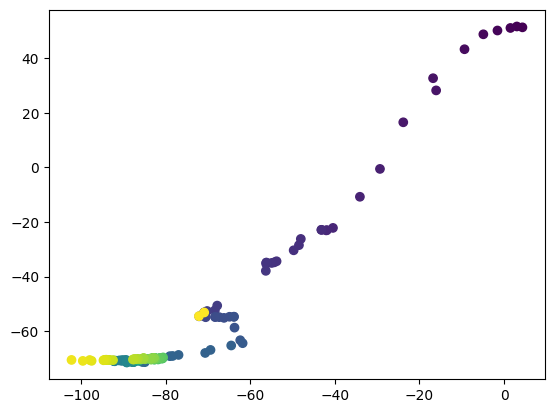

In [27]:
plt.scatter(points_lon, points_lat, zorder=5, c=days)

In [ ]:
#print(x,y)

## Smoothed route points tests

In [29]:
#!pip install shapelysmooth
from shapelysmooth import catmull_rom_smooth

points = list(zip(x, y))
#Remove duplicates
points = [k for k, g in itertools.groupby(points)]

smoothed = catmull_rom_smooth(points) #, alpha, subdivs)

#[s[1] for s in smoothed], [s[0] for s in smoothed]

In [30]:
print(len(points), len(smoothed))

140 1391


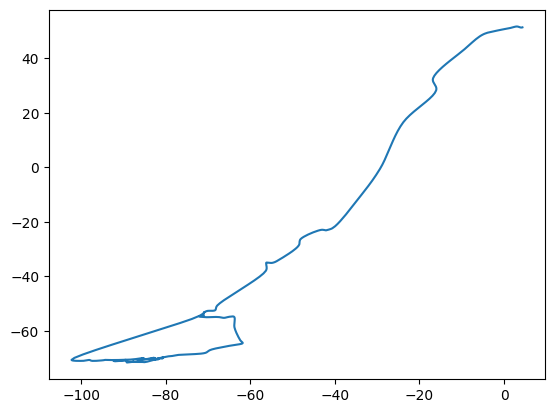

In [31]:
plt.plot([s[1] for s in smoothed], [s[0] for s in smoothed], zorder=5)

In [32]:
from scipy import spatial
kd = spatial.KDTree([list(p) for p in smoothed])
#distance,index = spatial.KDTree(A).query(pt)
pt = list(points[100])
res = kd.query(pt)
#smoothed[] # <-- the nearest point
print(res)
print(pt)
print(smoothed[res[1]])



(0.0, 1000)
[-70.0, -81.5]
(-70.0, -81.5)
